[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/saulventura/CS-7641-Assignment2/blob/main/Assignment2-Part-II.ipynb)
  
    

# Project:

The present project aims to predict if an employee will leave the current company (or will resign from the current company).
 
To understand the factors that lead an employee to leave the company, it is required to design a model that uses the current credentials/demographics/experience to predict if an employee is planning to leave the company.

This information is crucial, since managing correctly the Employee Attrition potential values, HR can implement some actions to retain those employees, or eventually hiring the new alternative of them.

# Employee Attrition
<img src="HRAnalytics.jpg" width="100%" height="100%"/>

In [4]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import mlrose_hiive
import time

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h1>1. Data Collection</h1></div>
</a><a class="anchor" id="exploration"></a>

In [5]:
train_orig = pd.read_csv('HRdataset.csv')

In [6]:
train_orig.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [7]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               902 non-null    int64  
 1   name                   902 non-null    object 
 2   phone number           902 non-null    int64  
 3   Location               902 non-null    object 
 4   Emp. Group             902 non-null    object 
 5   Function               902 non-null    object 
 6   Gender                 902 non-null    object 
 7   Tenure                 902 non-null    float64
 8   Tenure Grp.            902 non-null    object 
 9   Experience (YY.MM)     898 non-null    float64
 10  Marital Status         902 non-null    object 
 11  Age in YY.             902 non-null    float64
 12  Hiring Source          902 non-null    object 
 13  Promoted/Non Promoted  902 non-null    object 
 14  Job Role Match         900 non-null    object 
 15  Stay/L

test_orig.info()

In [8]:
train_orig.describe()

,table id,phone number,Tenure,Experience (YY.MM),Age in YY.
count,902.000000,9.020000e+02,902.000000,898.000000,902.000000
mean,451.500000,9.876544e+09,1.198293,5.150457,29.055288
std,260.529269,0.000000e+00,0.823203,3.483456,4.499554
min,1.000000,9.876544e+09,0.000000,0.030000,21.050000
25%,226.250000,9.876544e+09,0.110000,2.100000,26.050000
50%,451.500000,9.876544e+09,1.060000,4.110000,28.060000
75%,676.750000,9.876544e+09,2.040000,7.027500,31.070000
max,902.000000,9.876544e+09,3.000000,25.080000,52.060000


<div class="alert alert-block alert-info">
<b><h1>2. Data Preparation</h1></div>
</a><a class="anchor" id="exploration"></a>

Let's assing original dataframes to new ones.

In [9]:
train = train_orig.copy()

Renaming column labels when they contain blank spaces or any special character


In [10]:
def rename_column_labels(df, old_str = " ", new_str = "_"):
    """Rename column names to avoid special characters or blank spaces.
           Parameters:
               df (dataframe): The dataframe whose columns's names will be evaluated
               old_str (str): The character from the column's names to be replaced
               new_str (str): The character that will replace 'old_str'
            Returns:
               df (dataframe): The input dataframe with the columns renamed
    """
    display(Markdown('**Results:**' ))
    cols = df.loc[:,df.columns.str.contains(old_str)].shape[1]
    if cols > 0:
        print("Features changed => {0}".format(cols))
        display(df.loc[:,df.columns.str.contains(old_str)].columns.values)
        df.columns = [label.replace(old_str, new_str ) for label in df.columns]
    else:
        print("No changes were applied")
    return df

In [11]:
train = rename_column_labels(train)

**Results:**

Features changed => 11


array(['table id', 'phone number', 'Emp. Group', 'Gender ', 'Tenure Grp.',
       'Experience (YY.MM)', 'Marital Status', 'Age in YY.',
       'Hiring Source', 'Promoted/Non Promoted', 'Job Role Match'],
      dtype=object)

**4.1 Remove Columns/Rows**


<strong>Let's check what columns are indexes.</strong>

In [12]:
def list_index_columns(df):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() == len(df):
            print(f"{col.ljust(25)}" +  ' ==> Datatype: ' + str(df[col].dtypes) )

In [13]:
list_index_columns(train)

**Results:**

table_id                  ==> Datatype: int64


<strong>Let's do a quick review of list of values per each column.</strong>


In [14]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [15]:
list_column_values(train,10,'False')

**Results:**

name                      ==> ['Arnab', 'Dwane', 'Papu', 'Rahul', 'Shiv', 'shruti', 'sid']
phone_number              ==> [9876544345]
Emp._Group                ==> ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C3', 'D2']
Function                  ==> ['Operation', 'Sales', 'Support']
Gender_                   ==> ['Female', 'Male', 'other']
Tenure_Grp.               ==> ['< =1', '> 1 & < =3']
Marital_Status            ==> ['Div.', 'Marr.', 'NTBD', 'Sep.', 'Single']
Hiring_Source             ==> ['Agency', 'Direct', 'Employee Referral']
Promoted/Non_Promoted     ==> ['Non Promoted', 'Promoted']
Job_Role_Match            ==> ['No', 'Yes', nan]
Stay/Left                 ==> ['Left', 'Stay']


In [16]:
def list_column_values_percentage(df, number_of_values):
    display(Markdown('**Results:**' ))
    print('Columns with less than ' + str(number_of_values) + ' values')
    for col in df.columns[0:]:
        if train[col].nunique() <= number_of_values:
            print(df[col].value_counts()/len(train)) 

In [17]:
list_column_values_percentage(train,3)

**Results:**

Columns with less than 3 values
9876544345    1.0
Name: phone_number, dtype: float64
Operation    0.929047
Support      0.057650
Sales        0.013304
Name: Function, dtype: float64
Male      0.730599
Female    0.262749
other     0.006652
Name: Gender_, dtype: float64
> 1 & < =3    0.694013
< =1          0.305987
Name: Tenure_Grp., dtype: float64
Direct               0.792683
Agency               0.128603
Employee Referral    0.078714
Name: Hiring_Source, dtype: float64
Promoted        0.508869
Non Promoted    0.491131
Name: Promoted/Non_Promoted, dtype: float64
Yes    0.534368
No     0.463415
Name: Job_Role_Match, dtype: float64
Stay    0.660754
Left    0.339246
Name: Stay/Left, dtype: float64


In [18]:
def remove_column_values(df, columns_to_remove):
    display(Markdown('**Results:**'))
    print("Original number of features => {}".format(df.shape[1]))
    df = df.drop(columns_to_remove, axis=1)
    print("Number of features has been reduced to => {}".format(df.shape[1]))
    return df

** Let's remove column enrollee_id **

In [19]:
train = remove_column_values(train,'table_id')

**Results:**

Original number of features => 16
Number of features has been reduced to => 15


**Missing Values**

In [20]:
train.isnull().sum()

name                     0
phone_number             0
Location                 0
Emp._Group               0
Function                 0
Gender_                  0
Tenure                   0
Tenure_Grp.              0
Experience_(YY.MM)       4
Marital_Status           0
Age_in_YY.               0
Hiring_Source            0
Promoted/Non_Promoted    0
Job_Role_Match           2
Stay/Left                0
dtype: int64

In [21]:
np.round(100*train.isnull().sum()/ len(train),2)

name                     0.00
phone_number             0.00
Location                 0.00
Emp._Group               0.00
Function                 0.00
Gender_                  0.00
Tenure                   0.00
Tenure_Grp.              0.00
Experience_(YY.MM)       0.44
Marital_Status           0.00
Age_in_YY.               0.00
Hiring_Source            0.00
Promoted/Non_Promoted    0.00
Job_Role_Match           0.22
Stay/Left                0.00
dtype: float64

In [22]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        display(Markdown('**Results:**'))
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
missing_values_table(train)

**Results:**

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Experience_(YY.MM),4,0.4
Job_Role_Match,2,0.2


<AxesSubplot:>

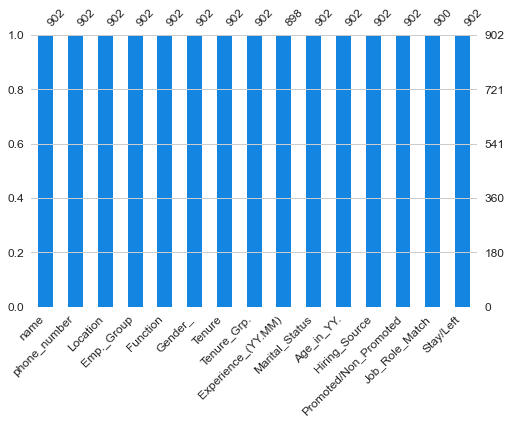

In [24]:
msno.bar(train, color = '#1585E2',fontsize=12,figsize = (8, 5))

<AxesSubplot:>

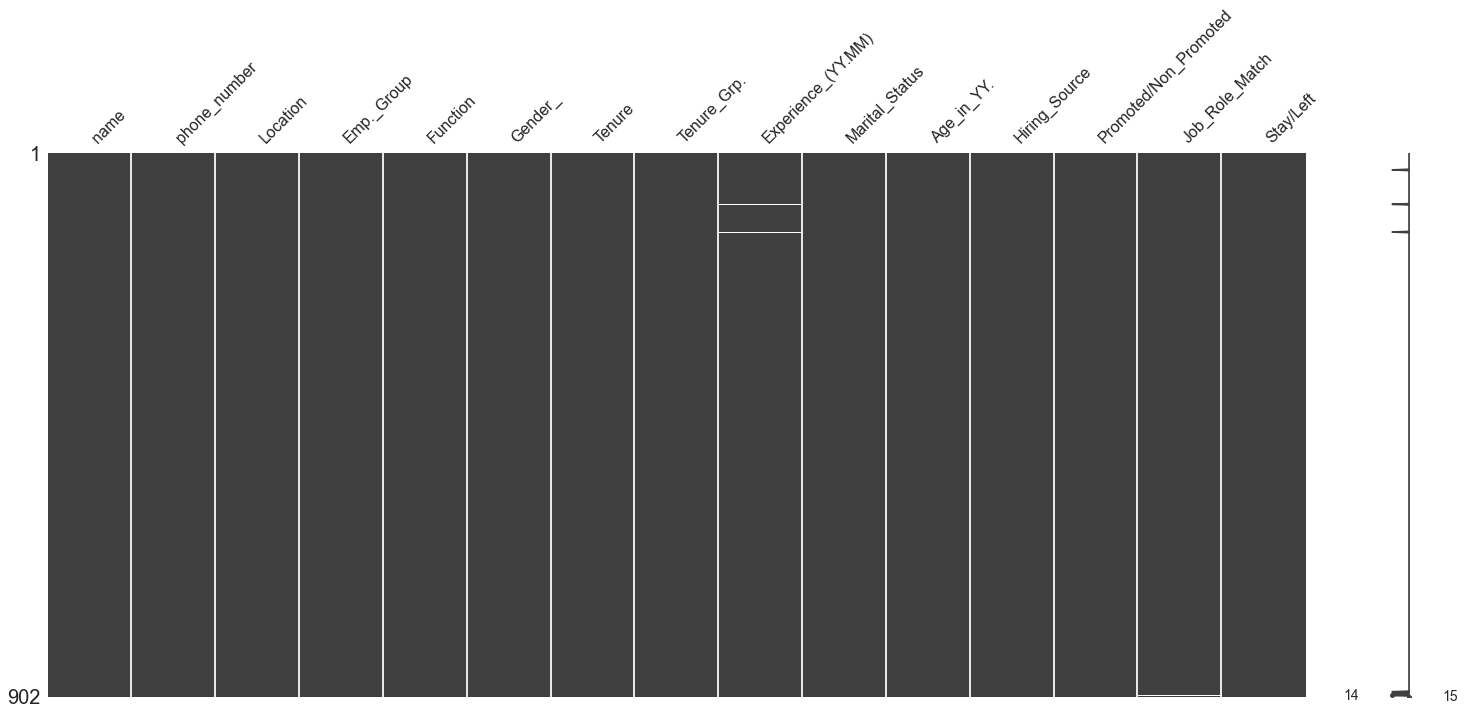

In [25]:
msno.matrix(train)


<AxesSubplot:>

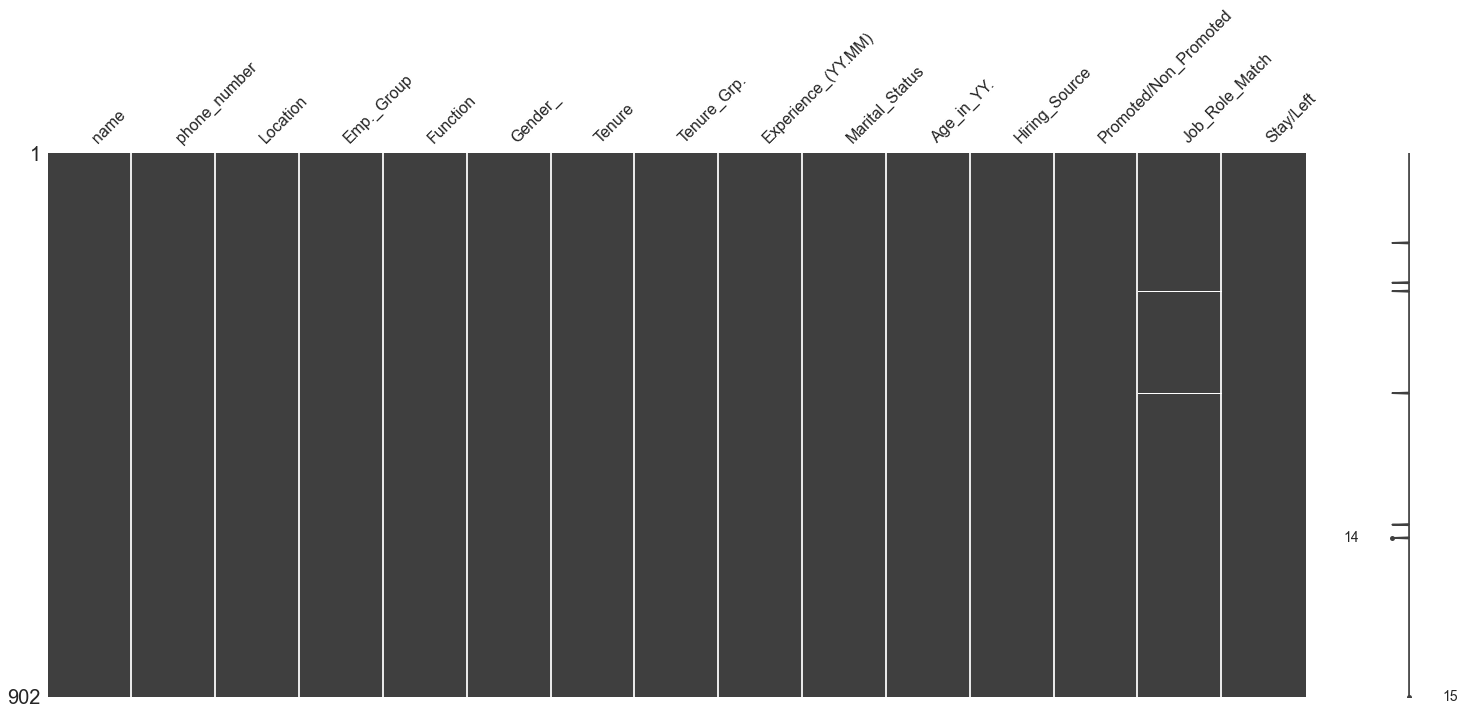

In [26]:
#sorted by gender
sorted = train.sort_values('Gender_')
msno.matrix(sorted)

<AxesSubplot:>

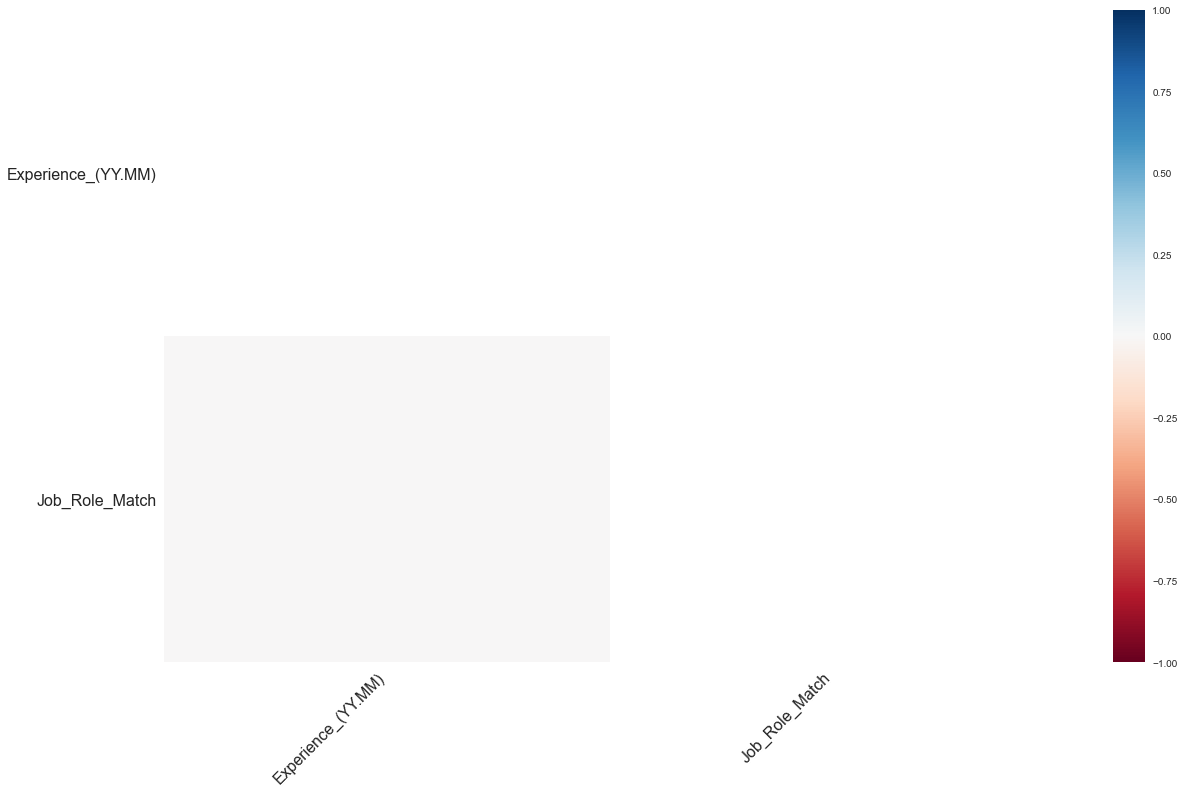

In [27]:
msno.heatmap(train)

<AxesSubplot:>

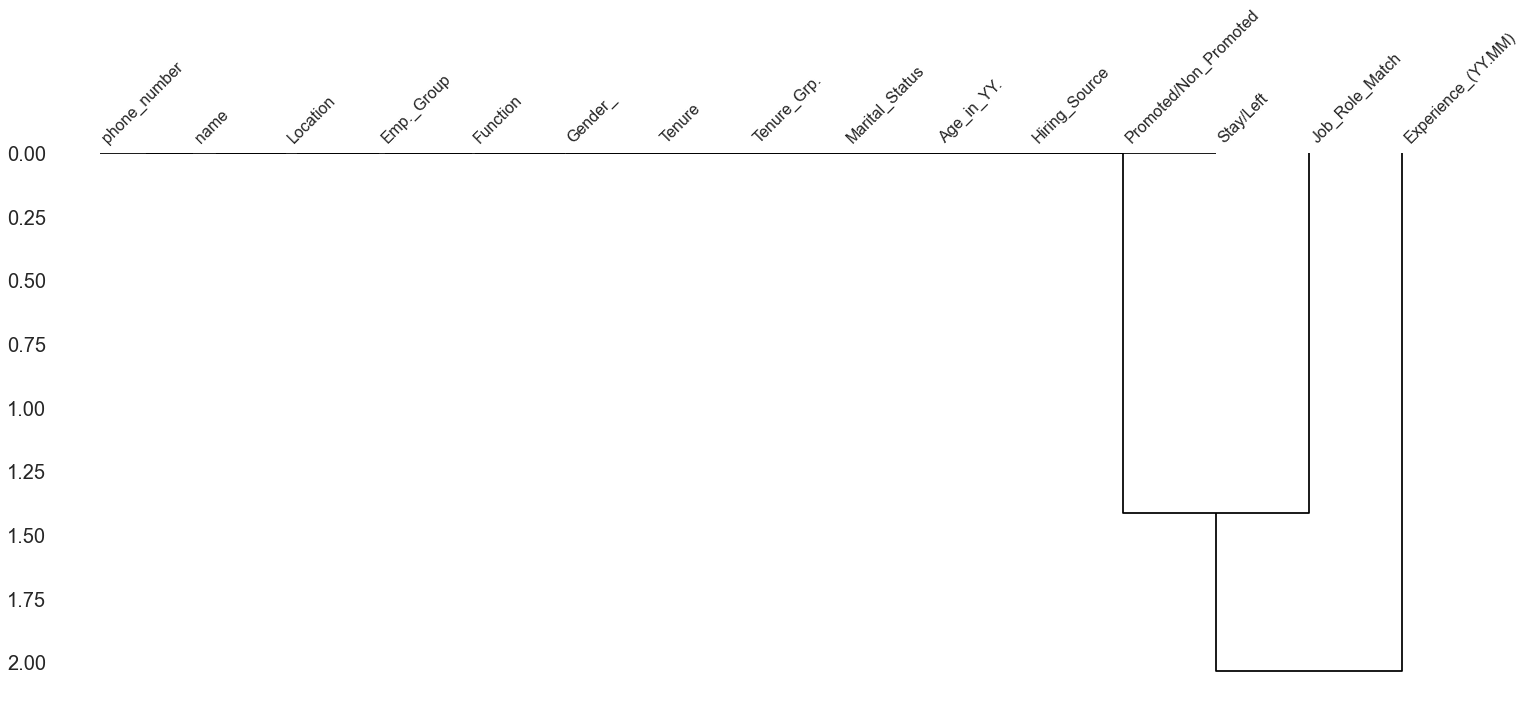

In [28]:
msno.dendrogram(train)

**Let's remove selected columns/rows with missing values.**

** Since there is no clear understanding/portion of missing columns, I don't plan to drop any columns from the list ** 

### Imputation

### New imputation technique: using regression model


<AxesSubplot:>

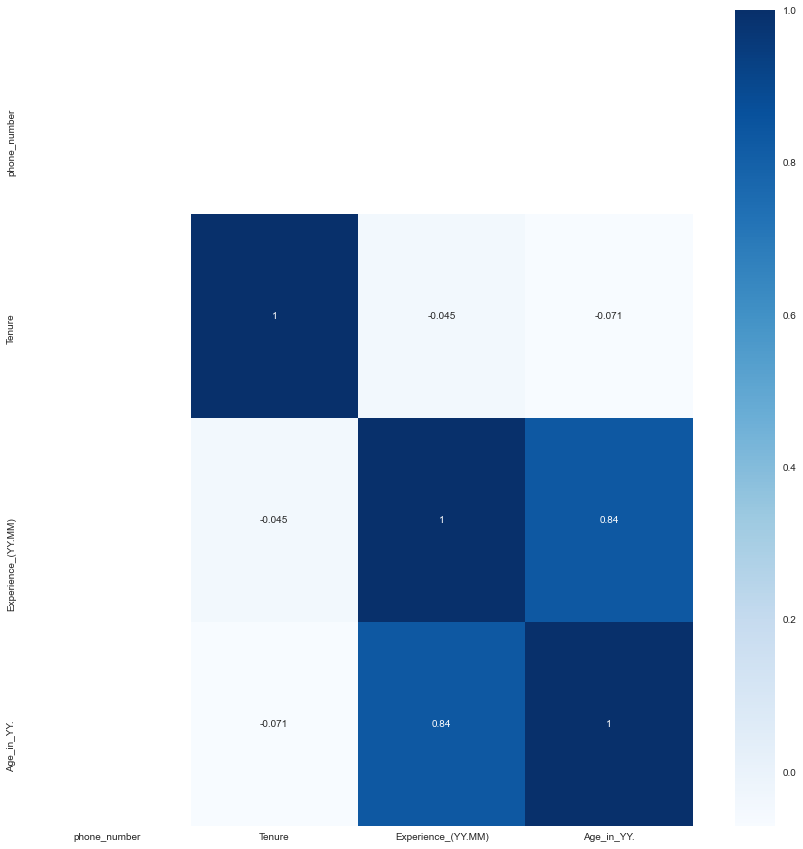

In [29]:
plt.subplots(figsize=(15,15))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

In [30]:
def regressor_inputer(df, output_column, input_column, decimals=2):
    
    display(Markdown('**Results:**'))
    #Missing values from Output column
    missing_output = df[output_column].isnull()
    print("Number of missing values in column: {} => {}".format(output_column,missing_output.sum() ))
    
    df_regressor = df.dropna(axis=0, subset = [output_column,input_column])
    df_regressor = df_regressor.loc[:,[output_column,input_column]]
    #Input column observations with Output column missing
    input_column_with_missing_output_column = pd.DataFrame(df[input_column][missing_output])
    input_column_with_missing_output_column = input_column_with_missing_output_column.dropna()
    #Creating regressor model
    x = df_regressor[[input_column]]
    y = df_regressor[[output_column]]
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    lm = LinearRegression().fit(x_train,y_train)
    print(f'R2 value in validation partition: {lm.score(x_val, y_val)}')
    #Predicting output column
    predictor = df[input_column][ df[output_column].isnull()  &  ~df[input_column].isnull() ] 
    predictor = pd.DataFrame(predictor)
    predictor[output_column]=  lm.predict( predictor[[input_column]] ) 
    df.loc[ df[output_column].isnull()  &  ~df[input_column].isnull() ,[output_column]] = predictor[output_column].round(decimals)
    print("New number of missing values in column: {} => {}".format(output_column, df[output_column].isnull().sum() ))
    return df
    #NOT CLEAR ON THIS FUNCTION 

In [31]:
#train = regressor_inputer(train,'company_size',0)

In [32]:
missing_values_table(train)

**Results:**

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Experience_(YY.MM),4,0.4
Job_Role_Match,2,0.2


<strong>Let's use mean/mode/median technique to impute missing values for column(s) identified in previous step.</strong>

In [33]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [34]:
train["Experience_(YY.MM)"] = most_frequent_imputer.fit_transform(train[["Experience_(YY.MM)"]])
train["Job_Role_Match"] = most_frequent_imputer.fit_transform(train[["Job_Role_Match"]])


<strong>Now, let's check the missingness of the dataset.</strong>

In [35]:
missing_values_table(train)

**Results:**

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


 #### Transforming Columns

<strong>Let's review object columns.</strong>

In [36]:
print("Column data types and their frequency\n{}".format(train.dtypes.value_counts()))

Column data types and their frequency
object     11
float64     3
int64       1
dtype: int64


In [37]:
train.dtypes

name                      object
phone_number               int64
Location                  object
Emp._Group                object
Function                  object
Gender_                   object
Tenure                   float64
Tenure_Grp.               object
Experience_(YY.MM)       float64
Marital_Status            object
Age_in_YY.               float64
Hiring_Source             object
Promoted/Non_Promoted     object
Job_Role_Match            object
Stay/Left                 object
dtype: object

In [38]:
def check_object_columns(df):
    object_columns_df = df.select_dtypes(include=['object'])
    print(object_columns_df.iloc[0])
    i=0
    for col in object_columns_df:
        if is_numeric_dtype(df[col]):
            i+=1
            print(f"{col.ljust(25)}" + ' ==> is Numeric')
    if i==0:
        display(Markdown('**Results:**'))
        print('No numeric columns were found')

In [39]:
check_object_columns(train)

name                              sid
Location                         Pune
Emp._Group                         B2
Function                    Operation
Gender_                          Male
Tenure_Grp.                      < =1
Marital_Status                 Single
Hiring_Source                  Direct
Promoted/Non_Promoted    Non Promoted
Job_Role_Match                    Yes
Stay/Left                        Left
Name: 0, dtype: object


**Results:**

No numeric columns were found


** Let's convert columns **

In [40]:
def columns_to_numeric(df,columns_to_convert = []):
    display(Markdown('**Results:**'))
    for col in columns_to_convert:
        if col in df.columns:
            if is_numeric_dtype(df[col]):
                df[col] = df[col].str.rstrip('%').astype('float')
                print("Column {} was converted".format(col))
            else:
                print("Column {} could not be converted".format(col))
        else:
            print("Column {} does not exist".format(col))
    return df

In [41]:
train = columns_to_numeric(train,[])
# Not sure why giving error on float columns ==> it only applies to STRING columns with numeric values

**Results:**

<div class="alert alert-block alert-info">
<b><h1>3. Exploratory Data Analysis</h1></div>
</a><a class="anchor" id="exploration"></a>

EDA is the process of performing initial investigations on data so as to:

<li>Uncover underlying structure & patterns in the data
<li>Identify important variables
<li>Identify anomalies
<li>Test a hypothesis
<li>Check assumptions
<li>Set the stage for model development

Exploratory Data Analysis is like listening to what the data can tell us before we start the actual modeling process for a head start. 

** Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.**

Target column is assigned to l_target variable.

In [42]:
l_target = 'Stay/Left'

<div class="alert alert-block alert-warning">
<b>3.1 Univariate Analysis</b>
</div> </a><a class="anchor" id="univariate"></a>

<strong>Let's quick review target column values/distribution.</strong>

In [43]:
list_column_values_percentage(train,15)

**Results:**

Columns with less than 15 values
Arnab     0.342572
Papu      0.222838
Dwane     0.170732
Shiv      0.140798
shruti    0.084257
sid       0.021064
Rahul     0.017738
Name: name, dtype: float64
9876544345    1.0
Name: phone_number, dtype: float64
Chennai       0.282705
Noida         0.261641
Bangalore     0.232816
Hyderabad     0.073171
Pune          0.062084
Madurai       0.032151
Lucknow       0.022173
Nagpur        0.015521
Vijayawada    0.008869
Mumbai        0.004435
Gurgaon       0.003326
Kolkata       0.001109
Name: Location, dtype: float64
B1    0.601996
B2    0.305987
B3    0.065410
B0    0.008869
B4    0.007761
B5    0.004435
B7    0.002217
C3    0.001109
B6    0.001109
D2    0.001109
Name: Emp._Group, dtype: float64
Operation    0.929047
Support      0.057650
Sales        0.013304
Name: Function, dtype: float64
Male      0.730599
Female    0.262749
other     0.006652
Name: Gender_, dtype: float64
> 1 & < =3    0.694013
< =1          0.305987
Name: Tenure_Grp., dtype: float64


In [44]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

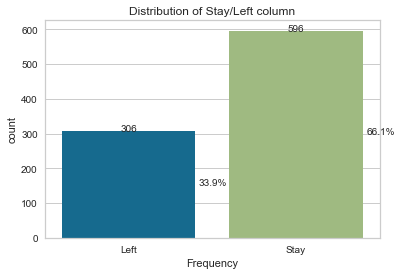

In [45]:
plot_target_column(train, l_target)

** Let's do again a quick review of list of values per each column **

In [46]:
list_column_values(train,15,'True')

**Results:**

name                      ==> ['Arnab', 'Dwane', 'Papu', 'Rahul', 'Shiv', 'shruti', 'sid']
phone_number              ==> [9876544345]
Location                  ==> ['Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Lucknow', 'Madurai', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'Vijayawada']
Emp._Group                ==> ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C3', 'D2']
Function                  ==> ['Operation', 'Sales', 'Support']
Gender_                   ==> ['Female', 'Male', 'other']
Tenure                    ==> more than 15 values
Tenure_Grp.               ==> ['< =1', '> 1 & < =3']
Experience_(YY.MM)        ==> more than 15 values
Marital_Status            ==> ['Div.', 'Marr.', 'NTBD', 'Sep.', 'Single']
Age_in_YY.                ==> more than 15 values
Hiring_Source             ==> ['Agency', 'Direct', 'Employee Referral']
Promoted/Non_Promoted     ==> ['Non Promoted', 'Promoted']
Job_Role_Match            ==> ['No', 'Yes']
Stay/Left                 ==> ['Left',

**Let's plot categorical columns.**

In [47]:
def plot_categorical_columns(df):
    categorical = train.select_dtypes(exclude=['int', 'float']).columns
    lcols_in_plot = 2
    lrows_in_plot = math.ceil(len(categorical)/lcols_in_plot)   
    fig, ax = plt.subplots( lrows_in_plot, lcols_in_plot , figsize=(20, 30))
    plt.subplots_adjust(wspace=0.2, hspace=1) 
    sns.set(font_scale = 1.1)
    for variable, subplot in zip(categorical, ax.flatten()):
        sns.countplot(train[variable], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")
            label.set_rotation_mode("anchor")

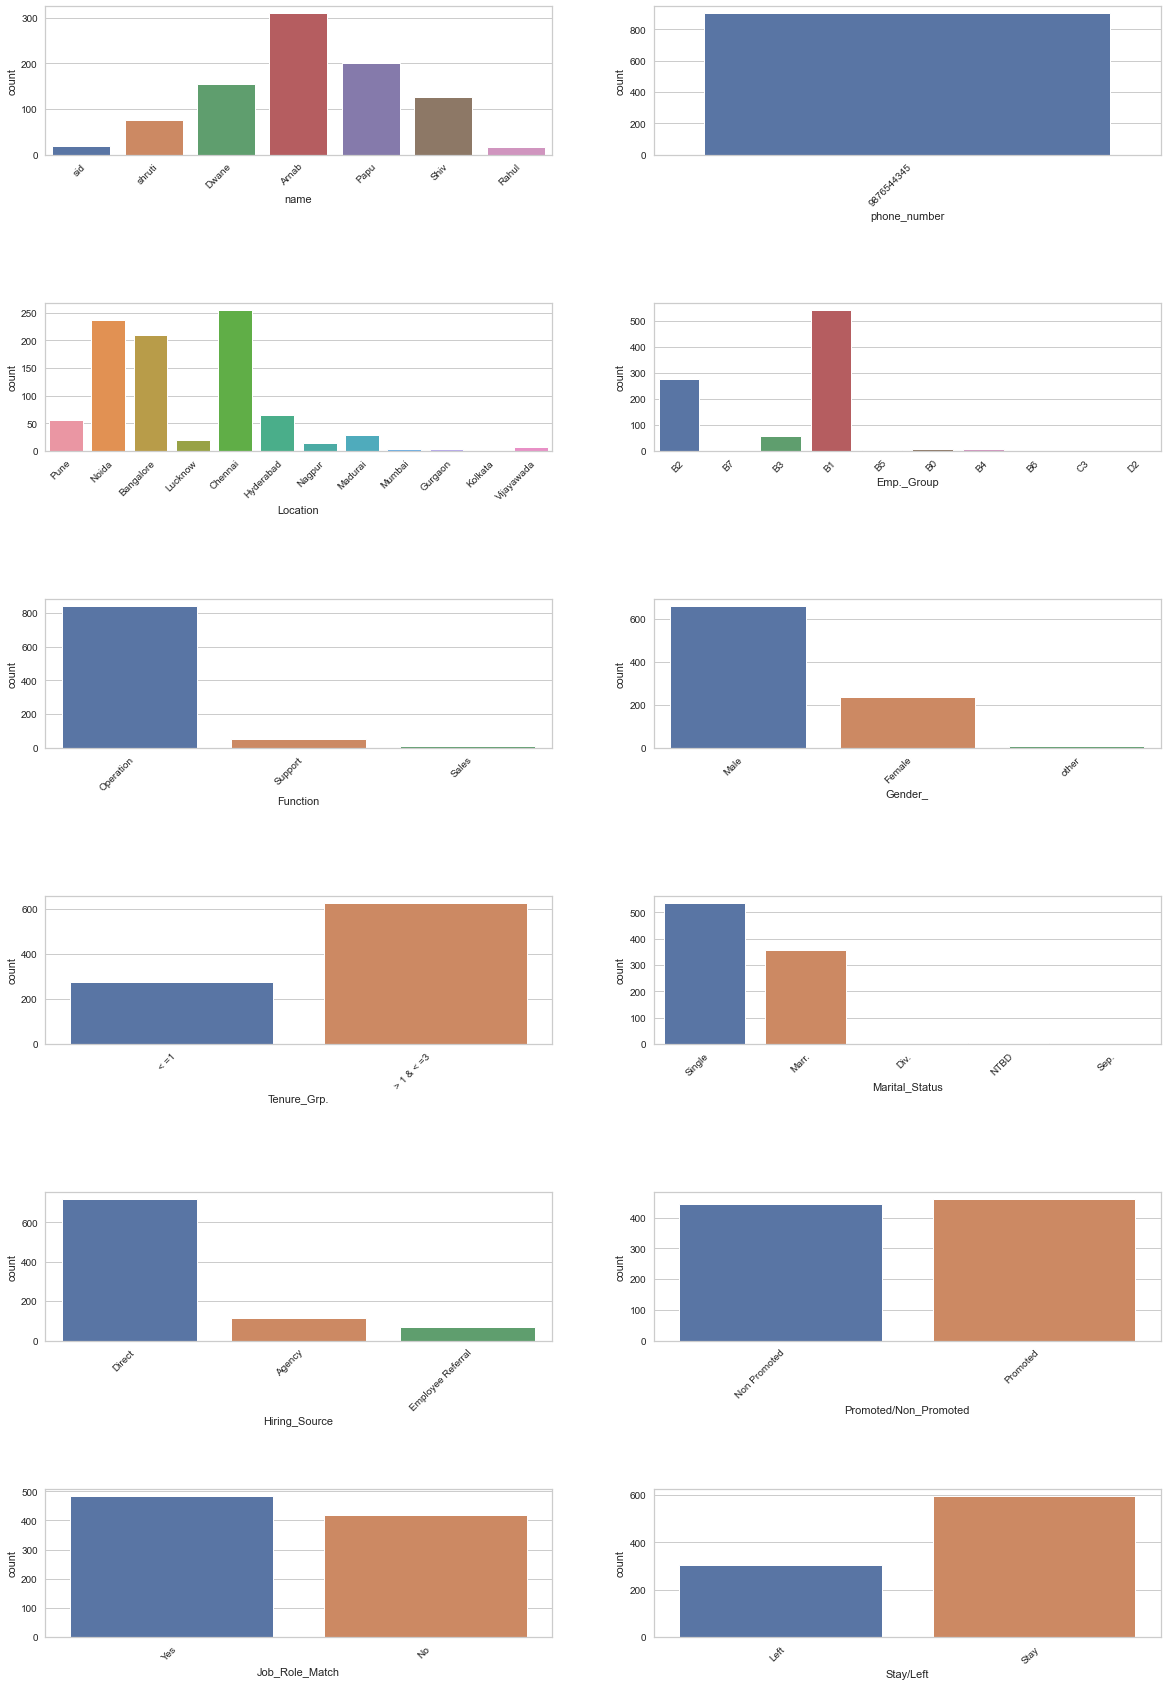

In [48]:
plot_categorical_columns(train)

** Let's plot numerical columns. Using standard and customized function.**

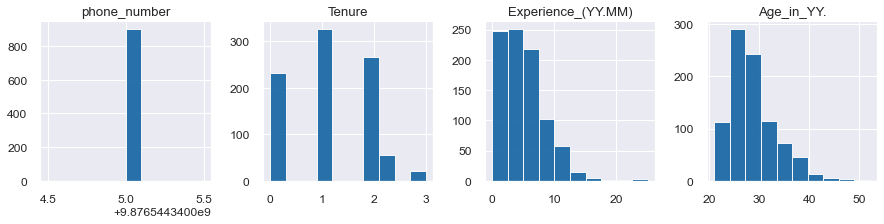

In [49]:
hist = train.hist(figsize = (15, 22), layout=(6, 4) , color='#1363a1',alpha=0.9 )

In [50]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

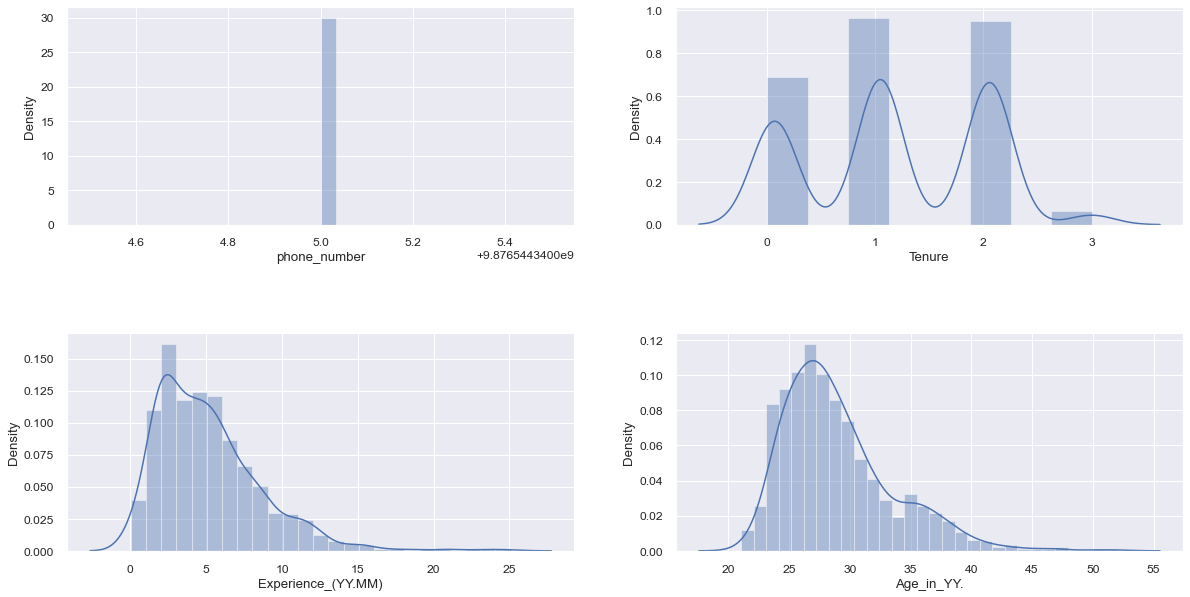

In [51]:
plot_numerical_columns(train)
### Not sure why I get this error

In [52]:
train.select_dtypes(include=object)

,name,Location,Emp._Group,Function,Gender_,Tenure_Grp.,Marital_Status,Hiring_Source,Promoted/Non_Promoted,Job_Role_Match,Stay/Left
0,sid,Pune,B2,Operation,Male,< =1,Single,Direct,Non Promoted,Yes,Left
1,sid,Noida,B7,Support,Male,< =1,Marr.,Direct,Promoted,No,Stay
2,sid,Bangalore,B3,Operation,Male,< =1,Marr.,Direct,Promoted,Yes,Stay
3,sid,Noida,B2,Operation,Male,< =1,Marr.,Direct,Promoted,Yes,Stay
4,sid,Lucknow,B2,Operation,Male,< =1,Marr.,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...
897,Rahul,Vijayawada,B1,Operation,Female,< =1,Single,Direct,Non Promoted,Yes,Stay
898,Rahul,Vijayawada,B1,Operation,Female,< =1,Single,Direct,Non Promoted,Yes,Left
899,Rahul,Vijayawada,B1,Operation,Female,< =1,Single,Direct,Non Promoted,Yes,Left
900,Rahul,Vijayawada,B1,Operation,Female,< =1,Single,Direct,Non Promoted,Yes,Stay


In [53]:
train.dtypes

name                      object
phone_number               int64
Location                  object
Emp._Group                object
Function                  object
Gender_                   object
Tenure                   float64
Tenure_Grp.               object
Experience_(YY.MM)       float64
Marital_Status            object
Age_in_YY.               float64
Hiring_Source             object
Promoted/Non_Promoted     object
Job_Role_Match            object
Stay/Left                 object
dtype: object

<div class="alert alert-block alert-warning">
<b>3.2 Bi-variate Analysis</b>
</div> </a><a class="anchor" id="bivariate"></a>

**Let's use crosstab function.**


In [54]:
train

,name,phone_number,Location,Emp._Group,Function,Gender_,Tenure,Tenure_Grp.,Experience_(YY.MM),Marital_Status,Age_in_YY.,Hiring_Source,Promoted/Non_Promoted,Job_Role_Match,Stay/Left
0,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,Yes,Left
900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


In [55]:
col = train.Gender_
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total", normalize='index')

Gender_,Female,Male,other
Stay/Left,,,
Left,0.238562,0.754902,0.006536
Stay,0.275168,0.718121,0.006711
Total,0.262749,0.730599,0.006652


In [56]:
col = train.Function
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total")
# These values are using absolute numbers

Function,Operation,Sales,Support,Total
Stay/Left,,,,
Left,282,4,20,306
Stay,556,8,32,596
Total,838,12,52,902


** pairplot() takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable :**

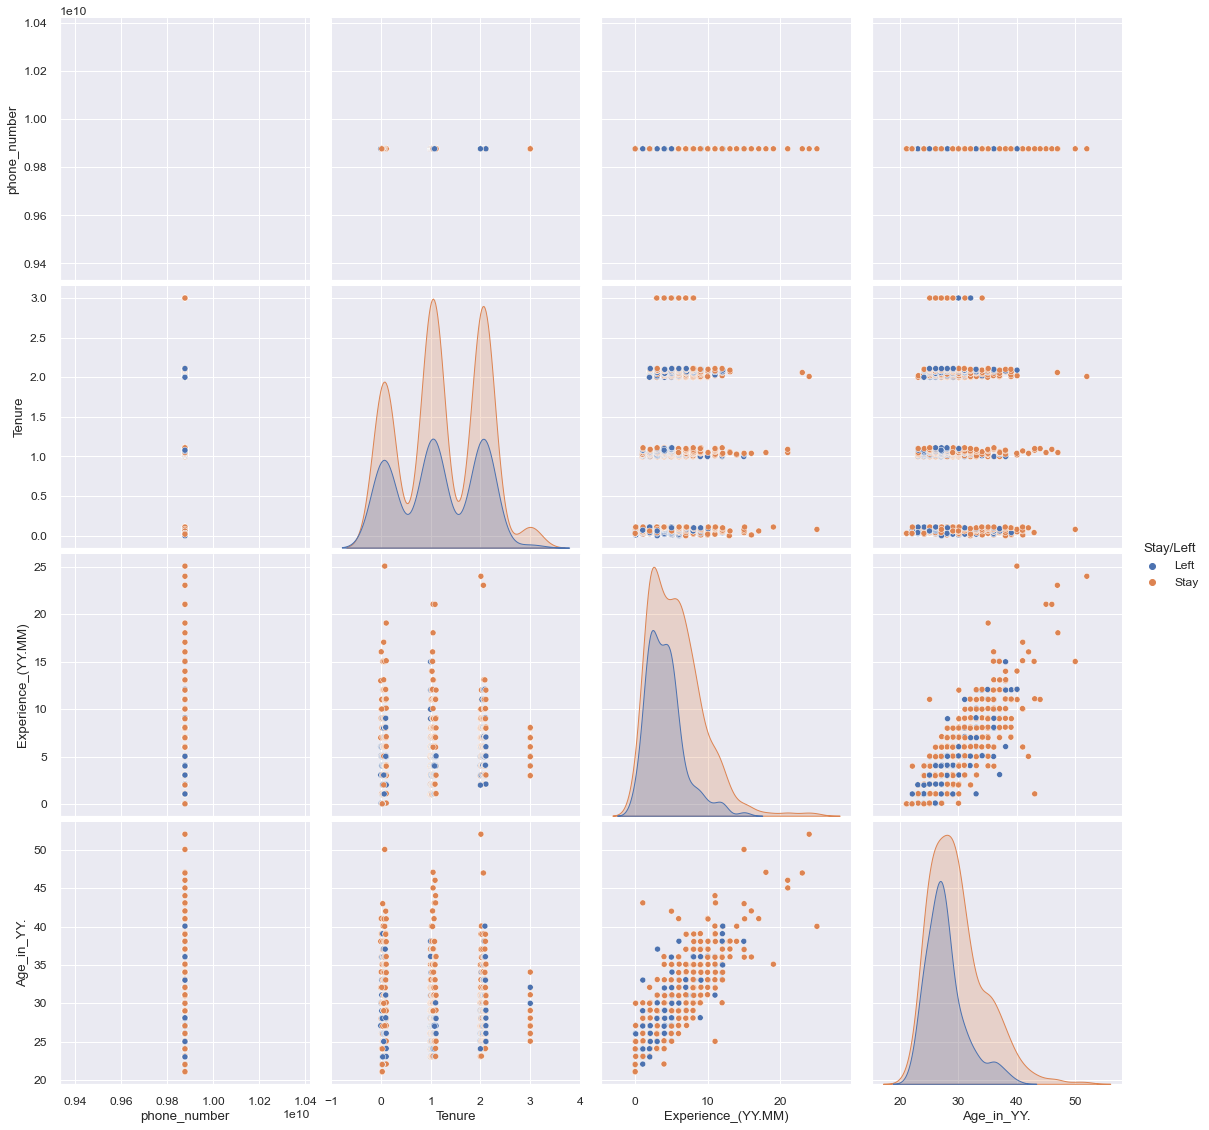

In [57]:
sns.pairplot(data=train, hue=l_target,  height=4);

In [58]:
train

,name,phone_number,Location,Emp._Group,Function,Gender_,Tenure,Tenure_Grp.,Experience_(YY.MM),Marital_Status,Age_in_YY.,Hiring_Source,Promoted/Non_Promoted,Job_Role_Match,Stay/Left
0,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,Yes,Left
900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


<div class="alert alert-block alert-info">
<b><h1>4. Feature Engineering</h1></div>
</a><a class="anchor" id="engineering"></a>

<strong>Let's move original tables to new ones.</strong>

In [59]:
train1 = train.copy()

In [60]:
print("Column data types and their frequency\n{}".format(train1.dtypes.value_counts()))

Column data types and their frequency
object     11
float64     3
int64       1
dtype: int64


In [61]:
list_column_values(train1,15,'True')

**Results:**

name                      ==> ['Arnab', 'Dwane', 'Papu', 'Rahul', 'Shiv', 'shruti', 'sid']
phone_number              ==> [9876544345]
Location                  ==> ['Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Lucknow', 'Madurai', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'Vijayawada']
Emp._Group                ==> ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C3', 'D2']
Function                  ==> ['Operation', 'Sales', 'Support']
Gender_                   ==> ['Female', 'Male', 'other']
Tenure                    ==> more than 15 values
Tenure_Grp.               ==> ['< =1', '> 1 & < =3']
Experience_(YY.MM)        ==> more than 15 values
Marital_Status            ==> ['Div.', 'Marr.', 'NTBD', 'Sep.', 'Single']
Age_in_YY.                ==> more than 15 values
Hiring_Source             ==> ['Agency', 'Direct', 'Employee Referral']
Promoted/Non_Promoted     ==> ['Non Promoted', 'Promoted']
Job_Role_Match            ==> ['No', 'Yes']
Stay/Left                 ==> ['Left',

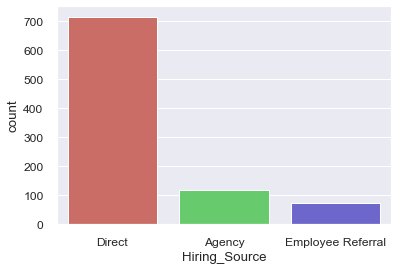

In [62]:
sns.countplot(x='Hiring_Source',data=train1, palette='hls')
plt.show();

<div class="alert alert-block alert-warning">
<b>4.1 General Transformation</b>
</div> </a><a class="anchor" id="general_trans"></a>

<strong>Let's replace categorical values with numerical values.</strong>

In [63]:
list_column_values(train1,15,'True')

**Results:**

name                      ==> ['Arnab', 'Dwane', 'Papu', 'Rahul', 'Shiv', 'shruti', 'sid']
phone_number              ==> [9876544345]
Location                  ==> ['Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Lucknow', 'Madurai', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'Vijayawada']
Emp._Group                ==> ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C3', 'D2']
Function                  ==> ['Operation', 'Sales', 'Support']
Gender_                   ==> ['Female', 'Male', 'other']
Tenure                    ==> more than 15 values
Tenure_Grp.               ==> ['< =1', '> 1 & < =3']
Experience_(YY.MM)        ==> more than 15 values
Marital_Status            ==> ['Div.', 'Marr.', 'NTBD', 'Sep.', 'Single']
Age_in_YY.                ==> more than 15 values
Hiring_Source             ==> ['Agency', 'Direct', 'Employee Referral']
Promoted/Non_Promoted     ==> ['Non Promoted', 'Promoted']
Job_Role_Match            ==> ['No', 'Yes']
Stay/Left                 ==> ['Left',

<strong>Let's convert remaining object columns to strings.</strong>

In [64]:
def object_to_str(df, to_str_cols):
    for col in to_str_cols:
        df[col] = df[col].astype(str)
    return df

** I don't have any columns with values left as string. So leaving it as is **

<div class="alert alert-block alert-warning">
<b>4.2 Encoding</b>
</div> </a><a class="anchor" id="encoding"></a>

In [65]:
train1.head()

,name,phone_number,Location,Emp._Group,Function,Gender_,Tenure,Tenure_Grp.,Experience_(YY.MM),Marital_Status,Age_in_YY.,Hiring_Source,Promoted/Non_Promoted,Job_Role_Match,Stay/Left
0,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [66]:
print("Column data types and their frequency\n{}".format(train1.dtypes.value_counts()))

Column data types and their frequency
object     11
float64     3
int64       1
dtype: int64


<strong>LABEL ENCODER</strong>

<strong> It Doesn't looks like that I need to use any of the encoding methods</strong>

In [67]:
from sklearn.preprocessing import LabelEncoder

encode_cols = ['name','Location','Emp._Group','Function','Gender_','Tenure_Grp.',
              'Marital_Status','Hiring_Source','Promoted/Non_Promoted','Job_Role_Match']


def labelencpode(df):
    enc = LabelEncoder()
    for col in encode_cols:
        enc.fit(df[col])
        df[col] = enc.transform(df[col])
    return df

train1 = labelencpode(train1)



In [68]:
def one_hot_encoder(df, cat_cols = ['city','gender','major_discipline','company_type']):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=cat_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [69]:
#cat_cols = ['city','gender','major_discipline','company_type']
#train1 = one_hot_encoder(train1,cat_cols)

In [70]:
train1.head()

,name,phone_number,Location,Emp._Group,Function,Gender_,Tenure,Tenure_Grp.,Experience_(YY.MM),Marital_Status,Age_in_YY.,Hiring_Source,Promoted/Non_Promoted,Job_Role_Match,Stay/Left
0,6,9876544345,10,2,0,1,0.00,0,6.08,4,27.12,1,0,1,Left
1,6,9876544345,9,7,2,1,0.00,0,13.00,1,38.08,1,1,0,Stay
2,6,9876544345,0,3,0,1,0.01,0,16.05,1,36.04,1,1,1,Stay
3,6,9876544345,9,2,0,1,0.01,0,6.06,1,32.07,1,1,1,Stay
4,6,9876544345,5,2,0,1,0.00,0,7.00,1,32.05,1,0,1,Stay


In [71]:
train1.drop('phone_number', axis=1, inplace=True)

# SCALING

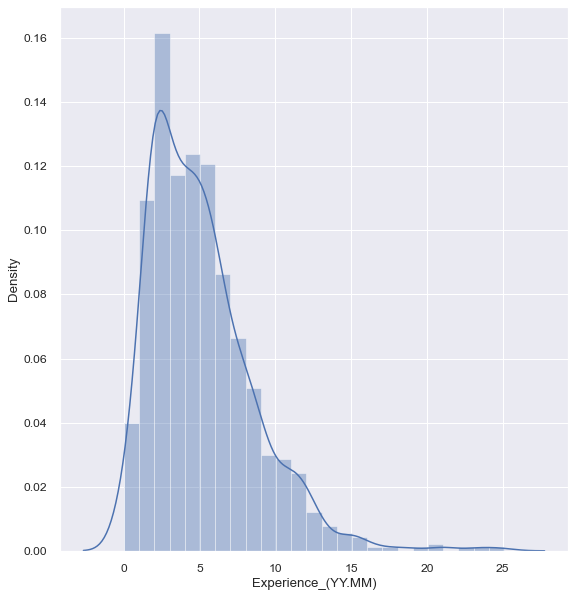

In [72]:
plot_numerical_columns(pd.DataFrame(train1['Experience_(YY.MM)']))

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


<div class="alert alert-block alert-info">
<b><h1>5. Model Training applying Randomized Optimization</h1></div>
<a class="anchor" id="training"></a>

<strong>Let's split the training dataset</strong>

In [74]:
train1['Stay/Left'] = train1['Stay/Left'].map({'Stay': 0, 'Left': 1})

In [155]:
y = train1[l_target].reset_index(drop=True)
X = train1.drop([l_target], axis=1)

In [156]:
X.shape, y.shape

((902, 13), (902,))

In [475]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import adjusted_mutual_info_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import accuracy_score, homogeneity_score, adjusted_rand_score
from sklearn.metrics import silhouette_score , completeness_score, v_measure_score

from sklearn.mixture import GaussianMixture
from scipy.stats import kurtosis
from scipy.spatial.distance import cdist

import itertools
import timeit

In [464]:
#pip install yellowbrick

<div class="alert alert-block alert-warning">
<b>1.1  K-means</b>
</div> </a><a class="anchor" id="encoding"></a>

In [465]:
def plotSilhouette(dataX, datay, clusters):
    silhouette = {}
    homogenity = {}
    for cluster in clusters:
        kmeans = KMeans(n_clusters=cluster,init='k-means++', max_iter=1000, random_state=100).fit(X)
        label = kmeans.labels_
        silhouette_coeff = silhouette_score(dataX, label, metric='euclidean')
        homogenity_score = homogeneity_score(datay, label)
        silhouette[cluster] = silhouette_coeff
        homogenity[cluster] = homogenity_score
    plt.figure()
    plt.plot(list(silhouette.keys()), list(silhouette.values()), label="Silhouette")
    plt.plot(list(homogenity.keys()), list(homogenity.values()), label="Homogeneity")
    plt.legend()
    plt.title("Silhouette & Homogenity")
    plt.ylabel("Silhouette coefficient")
    plt.xlabel("Number of clusters")
    plt.show()
    




def plotSilhouetteEM(dataX, datay, clusters):
    silhouetteEM = {}
    homogenityEM = {}
    gaussianScore = {}
    for cluster in clusters:
        gmm = GaussianMixture(n_components=cluster, max_iter=1000, random_state=100, n_init=5).fit(dataX)
        label = gmm.predict(dataX)
        silhouette_coeff = silhouette_score(dataX, label)
        homogenity_score = homogeneity_score(datay, label)
        silhouetteEM[cluster] = silhouette_coeff
        homogenityEM[cluster] = homogenity_score
        gaussianScore[cluster] = gmm.score(dataX)
    plt.figure()
    plt.plot(list(silhouetteEM.keys()), list(silhouetteEM.values()), label="Silhouette")
    plt.plot(list(homogenityEM.keys()), list(homogenityEM.values()), label="Homogeneity")
    plt.legend()
    plt.title("Expectation Maximization")
    plt.ylabel("Silhouette Coefficient")
    plt.xlabel("Number of clusters")
    plt.show()

    

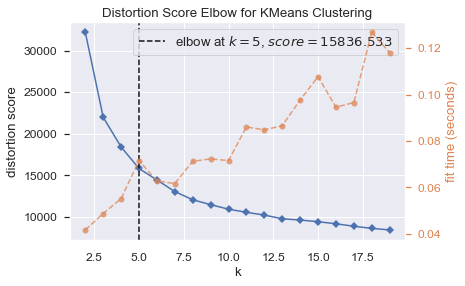

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [466]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=100)
visualizer = KElbowVisualizer(km, k=(2,20) )
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

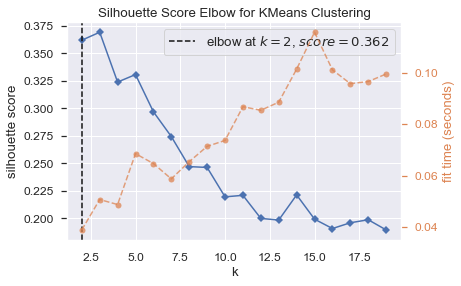

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [467]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=100)
visualizer = KElbowVisualizer(km, k=(2,20), metric='silhouette' )
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

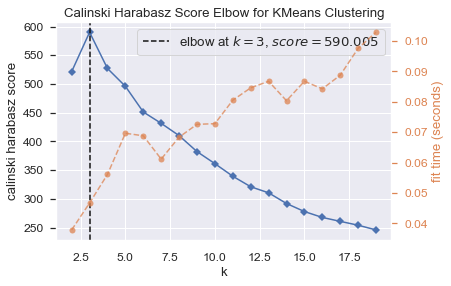

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [468]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=100)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Calinski-Harabasz score is a method for finding the ratio of average in-cluster dispersions and inter-cluster
dispersions. A lower score indicates a model with a weak group

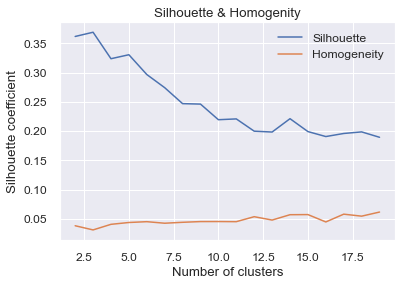

In [469]:
##Silhouette & homogenity Plotting

clusters = list(range(2, 20, 1))
plotSilhouette(X, y, clusters)

<div class="alert alert-block alert-warning">
<b>1.2 Expectation Maximization</b>
</div> </a><a class="anchor" id="encoding"></a>

In [458]:
# expectation maximization plot showing bic and silhouette score


def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=100, covariance_type='full')
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(silhouette_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(6, 10))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

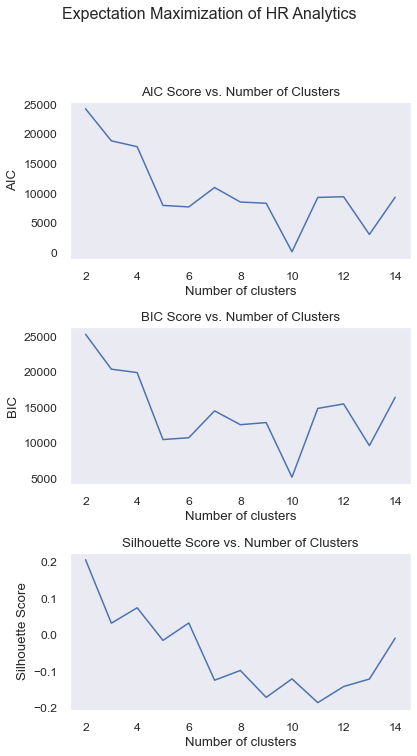

In [459]:
em_plot('HR Analytics', X)

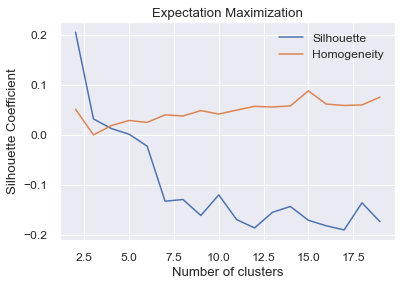

In [453]:
clusters = list(range(2, 20, 1))
plotSilhouetteEM(X, y, clusters)

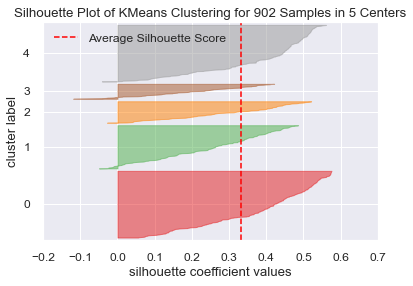

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 902 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [482]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

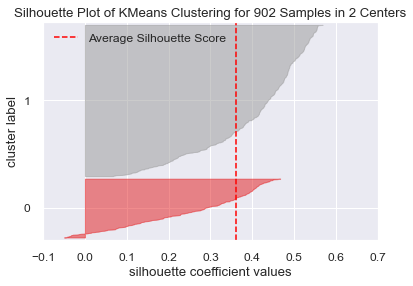

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 902 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [471]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [479]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 1:
        return cl
    perms = np.array(list(permutations((0, 1))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                   for perm in perms])
    p = perms[i]
    return p[cl]
def display_clustering(labels, title):
    """Plot the data points with the cluster
    colors."""

    # We relabel the classes when there are 3 clusters
    labels = relabel(labels)
    fig, axes = plt.subplots(1, 2, figsize=(8, 3),
                             sharey=True)
    # Display the points with the true labels on the
    # left, and with the clustering labels on the
    # right.
    for ax, c, title in zip(
            axes,
            [y, labels],
            ["True labels", title]):
        #ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
        ax.scatter(X['Experience_(YY.MM)'], X['Age_in_YY.'], c=c, s=30,           
                   linewidths=0, cmap=plt.cm.rainbow)
        ax.set_title(title)

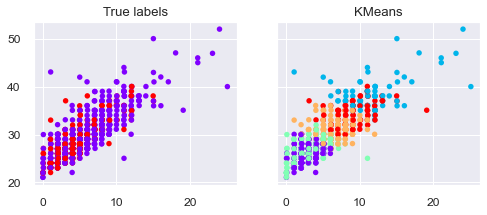

In [481]:
km = KMeans(5)
km.fit(X)

labels = relabel(km.labels_)
labels
display_clustering(km.labels_, "KMeans")

<div class="alert alert-block alert-warning">
<b>2 Dimensionality Reduction</b>
</div> </a><a class="anchor" id="encoding"></a>

In [247]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')

def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)

#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)

In [484]:
from sklearn.preprocessing import scale, LabelEncoder
X_scaled = scale(X)

--------------------------------------------------------------------------------
*  HR Analytics PCA  *
--------------------------------------------------------------------------------


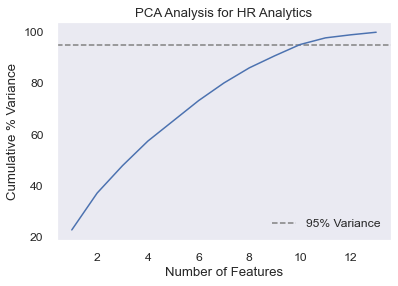

HR Analytics total features: 13
Best Number of PCA Components: 10
Total Time: 0.001 seconds
PCA Reconstruction Error:  1.1164569586849151e-30
--------------------------------------------------------------------------------
*  HR Analytics ICA  *
--------------------------------------------------------------------------------


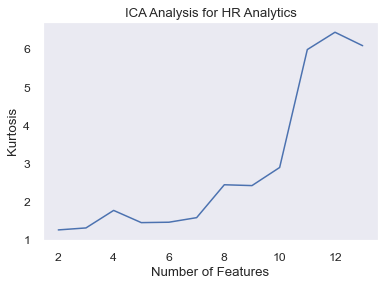

Total Number of Features: 13
Best Number of ICA Components: 12
Total Time: 0.089 seconds
ICA Reconstruction Error:  0.04721491606051749
--------------------------------------------------------------------------------
*  HR Analytics RP  *
--------------------------------------------------------------------------------


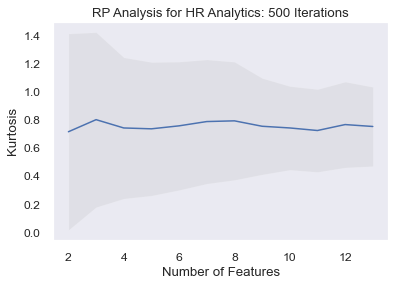

Total Number of Features: 13
Best Number of RP Components: 3
Total Time: 4.963 seconds
RP Reconstruction Error:  0.942490926905704
--------------------------------------------------------------------------------
*  HR Analytics UFS  *
--------------------------------------------------------------------------------


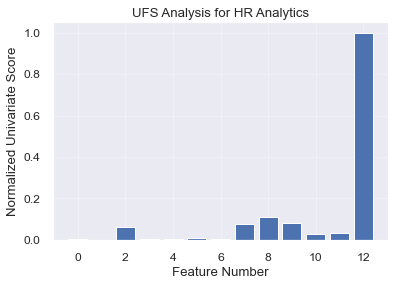

Total Time: 0.137 seconds


In [489]:
X_scaled = scale(X)

#
# PCA
#
            
print_line('HR Analytics PCA')
HR_pca_components = calc_pca_components(X_scaled, 'HR Analytics')
HR_PCA = PCA(n_components=HR_pca_components, random_state=100).fit(X_scaled)
HR_pca_sse = reconstruction_error(HR_PCA, X_scaled)
print('PCA Reconstruction Error: ', HR_pca_sse)



#
# ICA
#
print_line('HR Analytics ICA')
HR_ica_components = calc_ica_components(X_scaled, 'HR Analytics')
HR_ICA = FastICA(n_components=HR_ica_components, random_state=100).fit(X_scaled)
HR_ica_sse = reconstruction_error(HR_ICA, X_scaled)
print('ICA Reconstruction Error: ', HR_ica_sse)


#
# RP
#
print_line('HR Analytics RP')
HR_rp_components = calc_rp_components(X_scaled, 'HR Analytics', 500)
HR_RP = RP(n_components=HR_rp_components, random_state=100).fit(X_scaled)
HR_rp_sse = reconstruction_error(HR_RP, X_scaled)
print('RP Reconstruction Error: ', HR_rp_sse)


#
# UFS
#
print_line('HR Analytics UFS')
calc_kbest(X_scaled, y, 'HR Analytics')

In [323]:
#pip install tabulate

In [490]:
from tabulate import tabulate

PCA_all_data = [["","PCA","ICA","RP","UFS"]]

PCA_all_data.append(["Number of Components",10,12,7,5 ])
PCA_all_data.append(["Process Time (seconds)",0.001,0.102,0.126,0.156])
PCA_all_data.append(["Reconstruction Error ",1.1e-30,0.047,0.483,'N/A'])


In [491]:
print(tabulate(PCA_all_data,headers='firstrow',tablefmt='fancy_grid'))

╒════════════════════════╤══════════╤════════╤═══════╤═══════╕
│                        │      PCA │    ICA │    RP │ UFS   │
╞════════════════════════╪══════════╪════════╪═══════╪═══════╡
│ Number of Components   │ 10       │ 12     │ 7     │ 5     │
├────────────────────────┼──────────┼────────┼───────┼───────┤
│ Process Time (seconds) │  0.001   │  0.102 │ 0.126 │ 0.156 │
├────────────────────────┼──────────┼────────┼───────┼───────┤
│ Reconstruction Error   │  1.1e-30 │  0.047 │ 0.483 │ N/A   │
╘════════════════════════╧══════════╧════════╧═══════╧═══════╛


<div class="alert alert-block alert-warning">
<b>3 Clustering + Dimensionality Reduction</b>
</div> </a><a class="anchor" id="encoding"></a>

In [492]:
# Run all kmeans and plot results
def compare_kmeans(dataName, datasets):
    # Loop through all datasets
    all_sse = []
    all_scores = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        sse    = []
        scores = []
        
        # try different cluster sizes
        for i in range(2,15):
            kmeans = KMeans(n_clusters=i,init='k-means++', random_state=100)
            kmeans.fit(data)
            sse.append(kmeans.inertia_)
            
            kmeans_labels = kmeans.predict(data)
            scores.append(silhouette_score(data, kmeans_labels))
            
        all_sse.append(sse)
        all_scores.append(scores)
        all_methods.append(d[0])
                    
    # Plot the data
    title = "K-means of " + dataName + " Using Dimensionality Reduction"
    plt.figure(figsize=(8, 6))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(211)
    for i,sse in enumerate(all_sse):
        plt.plot(range(2,15), sse, lines[i], label=all_methods[i])
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    for i, score in enumerate(all_scores):
        plt.plot(range(2,15), score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()
    
def compare_em(dataName, datasets):
    # Loop through all datasets
    all_aic     = []
    all_bic     = []
    all_scores  = []
    all_dims    = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        dimensions = data.shape[1] + 1
        all_dims.append(list(range(2,dimensions)))
        
        aic    = []
        bic    = []
        scores = []
        
        for i in range(2,dimensions):
            gmm = GaussianMixture(n_components=i, random_state=0)
            gmm.fit(data)
            aic.append(gmm.aic(data))
            bic.append(gmm.bic(data))
        
            gmm_labels = gmm.predict(data)
            scores.append(silhouette_score(data, gmm_labels))
        
        all_aic.append(aic)
        all_bic.append(bic)
        all_scores.append(scores)
        all_methods.append(d[0])
    
    # Plot the data
    title = "EM of " + dataName + " Using Dimensionality Reduction"
    fig = plt.figure(figsize=(10, 8))
    
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(311)
    for i,aic in enumerate(all_aic):
        plt.plot(all_dims[i], aic, lines[i], label=all_methods[i])
    plt.title("AIC vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplot(312)
    for i,bic in enumerate(all_bic):
        plt.plot(all_dims[i], bic, lines[i], label=all_methods[i])
    plt.title("BIC Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.subplot(313)
    for i,score in enumerate(all_scores):
        plt.plot(all_dims[i], score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def bench_kmeans(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             homogeneity_score(labels, estimator.labels_),
             completeness_score(labels, estimator.labels_),
             v_measure_score(labels, estimator.labels_),
             adjusted_rand_score(labels, estimator.labels_),
             adjusted_mutual_info_score(labels,  estimator.labels_),
             silhouette_score(data, estimator.labels_, metric='euclidean')))
   
def bench_em(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    gmm_labels = estimator.predict(data)
    print('%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.aic(data), estimator.bic(data),
             homogeneity_score(labels, gmm_labels),
             completeness_score(labels, gmm_labels),
             v_measure_score(labels, gmm_labels),
             adjusted_rand_score(labels, gmm_labels),
             adjusted_mutual_info_score(labels,  gmm_labels),
             silhouette_score(data, gmm_labels, metric='euclidean')))

In [493]:
HR_PCA = PCA(n_components=10, random_state=0).fit_transform(X_scaled)
HR_ICA = FastICA(n_components=12, random_state=0).fit_transform(X_scaled)
HR_RP  = RP(n_components=8, random_state=0).fit_transform(X_scaled)
HR_UFS = SelectKBest(f_classif, k=5).fit_transform(X_scaled, y)

HR_data = []
HR_data.append(['Original', X_scaled])
HR_data.append(['PCA', HR_PCA])
HR_data.append(['ICA', HR_ICA])
HR_data.append(['RP',  HR_RP])
HR_data.append(['UFS', HR_UFS])

### K-means

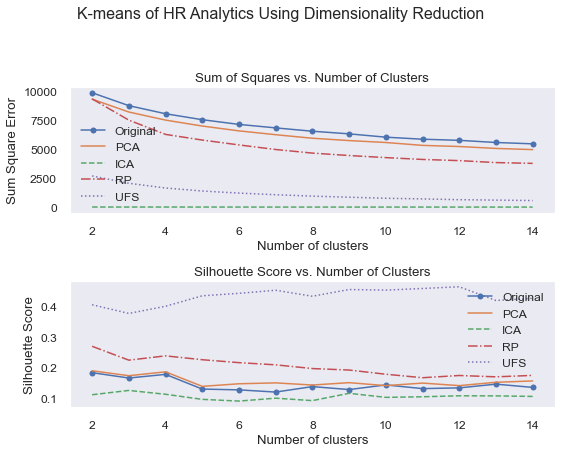

--------------------------------------------------------------------------------
*  K-Means HR Analytics Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.04s	9876	0.037	0.038	0.037	-0.011	0.036	0.183
PCA-based	0.04s	9323	0.037	0.038	0.038	-0.012	0.037	0.188
ICA-based	0.04s	11	0.398	0.369	0.383	0.433	0.382	0.095
RP-based 	0.07s	9347	0.051	0.052	0.052	-0.005	0.051	0.270
UFS-based	0.04s	2695	0.048	0.049	0.048	-0.007	0.048	0.406


In [494]:
# Create k-means plots
compare_kmeans('HR Analytics', HR_data)

# Create k-means benchmark table
print_line('K-Means HR Analytics Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="Original",  data=X_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="PCA-based", data=HR_PCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="ICA-based", data=HR_ICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="RP-based",  data=HR_RP)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="UFS-based", data=HR_UFS)

### Expectation Maximization

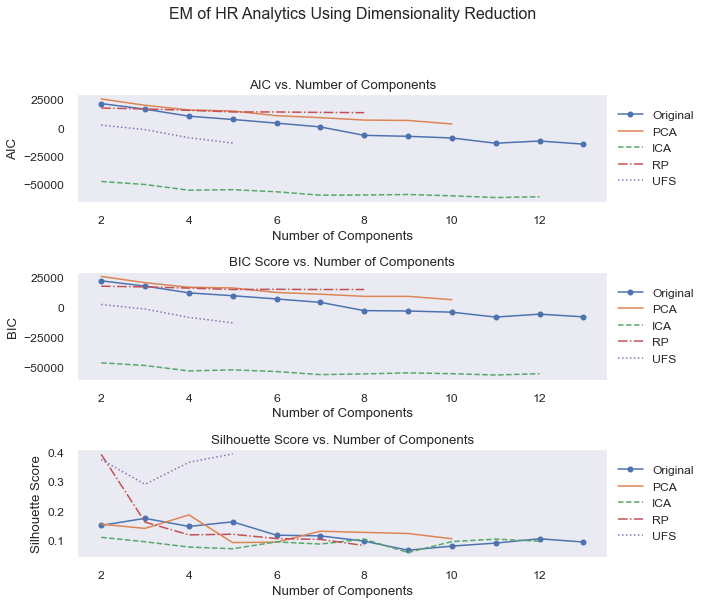

--------------------------------------------------------------------------------
*  EM HR Analytics Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.03s	7151	9668	0.007	0.004	0.005	0.006	0.003	0.163
PCA-based	0.03s	14639	16220	0.143	0.078	0.101	0.129	0.099	0.092
ICA-based	0.04s	-54832	-52651	0.004	0.002	0.003	0.001	0.001	0.071
RP-based 	0.04s	13812	14888	0.037	0.015	0.022	0.019	0.020	0.121
UFS-based	0.03s	-13637	-13138	0.492	0.221	0.305	0.263	0.304	0.394


In [495]:
# Create k-means plots
compare_em('HR Analytics', HR_data)

# Create k-means benchmark table
print_line('EM HR Analytics Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=5, random_state=0), labels=y, name="Original",  data=X_scaled)
bench_em(GaussianMixture(n_components=5, random_state=0), labels=y, name="PCA-based", data=HR_PCA)
bench_em(GaussianMixture(n_components=5, random_state=0), labels=y, name="ICA-based", data=HR_ICA)
bench_em(GaussianMixture(n_components=5, random_state=0), labels=y, name="RP-based",  data=HR_RP)
bench_em(GaussianMixture(n_components=5, random_state=0), labels=y, name="UFS-based", data=HR_UFS)

### 4

--------------------------------------------------------------------------------
*  EM HR Analytics Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.04s	10065	12078	0.059	0.029	0.039	0.013	0.037	0.147
PCA-based	0.03s	15532	16795	0.003	0.002	0.003	0.005	0.000	0.186
ICA-based	0.04s	-55308	-53564	0.046	0.023	0.031	0.039	0.029	0.077
RP-based 	0.04s	15236	16096	0.030	0.015	0.020	0.026	0.019	0.119
UFS-based	0.01s	-8957	-8558	0.428	0.235	0.303	0.280	0.302	0.365

### 3

--------------------------------------------------------------------------------
*  EM HR Analytics Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.02s	16258	17766	0.013	0.012	0.012	-0.003	0.011	0.175
PCA-based	0.04s	19691	20637	0.027	0.017	0.021	0.006	0.019	0.141
ICA-based	0.03s	-50289	-48983	0.002	0.001	0.002	0.009	0.000	0.095
RP-based 	0.03s	16430	17074	0.021	0.013	0.016	0.022	0.015	0.162
UFS-based	0.01s	-1810	-1512	0.407	0.343	0.372	0.417	0.371	0.290

### 2

--------------------------------------------------------------------------------
*  EM HR Analytics Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.02s	21197	22201	0.048	0.046	0.047	0.023	0.046	0.151
PCA-based	0.01s	25261	25890	0.056	0.053	0.054	0.021	0.054	0.155
ICA-based	0.01s	-47610	-46740	0.048	0.046	0.047	0.023	0.046	0.110
RP-based 	0.02s	17257	17685	0.000	0.001	0.000	-0.006	-0.001	0.393
UFS-based	0.01s	2165	2362	0.048	0.046	0.047	0.023	0.046	0.375

<div class="alert alert-block alert-warning">
<b>4 NN with Dimensionality Reduction</b>
</div> </a><a class="anchor" id="encoding"></a>

In [370]:
# Function based on:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='f1',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
# Function based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0

In [371]:
# split into train and test sets

HR_PCA = PCA(n_components=10, random_state=100).fit_transform(X_scaled)
HR_ICA = FastICA(n_components=12, random_state=100).fit_transform(X_scaled)
HR_RP  = RP(n_components=8, random_state=100).fit_transform(X_scaled)
HR_UFS = SelectKBest(f_classif, k=5).fit_transform(X_scaled, y)

HR_data = []
HR_data.append(['Original', X_scaled])
HR_data.append(['PCA', HR_PCA])
HR_data.append(['ICA', HR_ICA])
HR_data.append(['RP',  HR_RP])
HR_data.append(['UFS', HR_UFS])

### Neural Net Training

In [372]:
labels = ['Stay', 'Left']


--------------------------------------------------------------------------------
*  Original  *
--------------------------------------------------------------------------------
Neural Net model fit in 33.027 s
Best Score: 0.837 using {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'adam'}


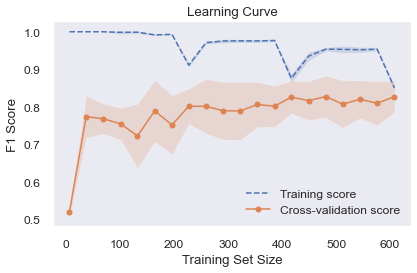

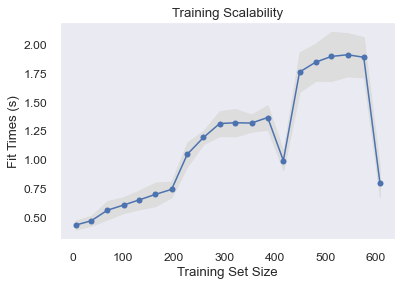

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       148
           1       0.83      0.91      0.87        78

    accuracy                           0.90       226
   macro avg       0.89      0.90      0.89       226
weighted avg       0.91      0.90      0.90       226



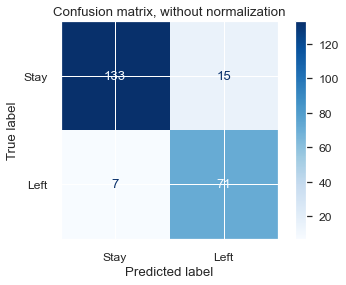

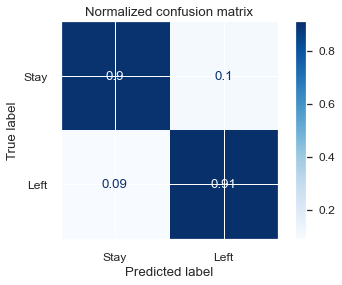

--------------------------------------------------------------------------------
*  PCA  *
--------------------------------------------------------------------------------
Neural Net model fit in 33.072 s
Best Score: 0.838 using {'hidden_layer_sizes': (40, 10), 'learning_rate': 'constant', 'solver': 'adam'}


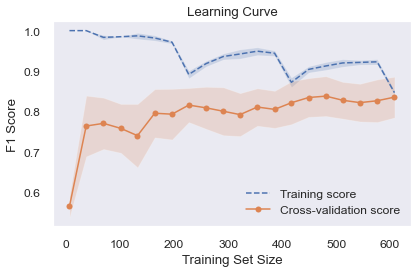

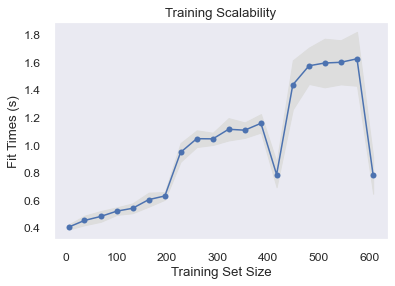

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       148
           1       0.88      0.92      0.90        78

    accuracy                           0.93       226
   macro avg       0.92      0.93      0.92       226
weighted avg       0.93      0.93      0.93       226



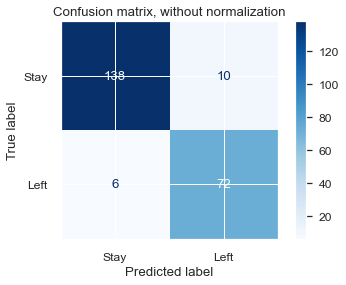

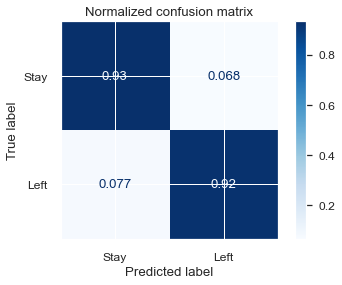

--------------------------------------------------------------------------------
*  ICA  *
--------------------------------------------------------------------------------
Neural Net model fit in 23.049 s
Best Score: 0.835 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


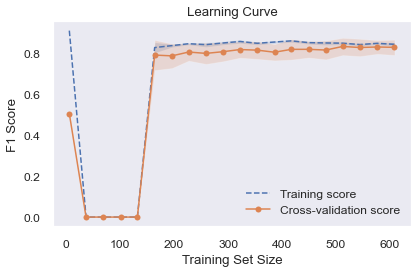

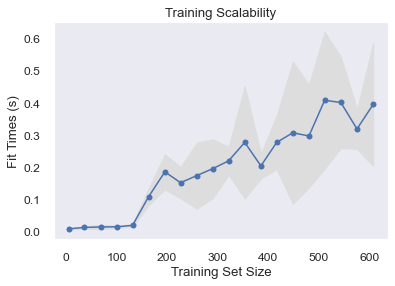

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       148
           1       0.79      0.92      0.85        78

    accuracy                           0.89       226
   macro avg       0.87      0.90      0.88       226
weighted avg       0.90      0.89      0.89       226



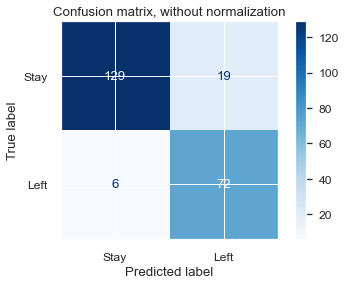

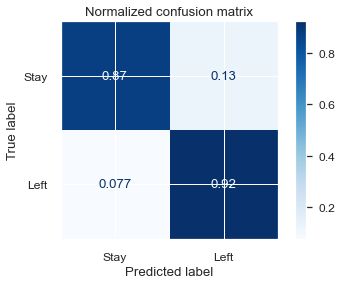

--------------------------------------------------------------------------------
*  RP  *
--------------------------------------------------------------------------------
Neural Net model fit in 37.454 s
Best Score: 0.815 using {'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'solver': 'adam'}


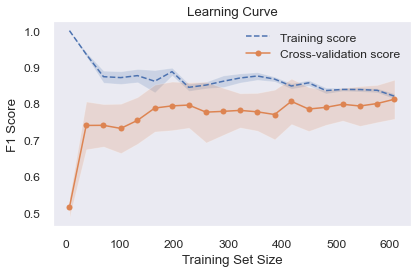

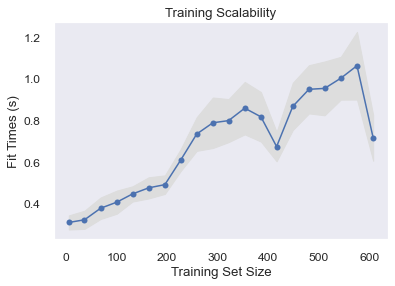

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       148
           1       0.76      0.87      0.81        78

    accuracy                           0.86       226
   macro avg       0.85      0.86      0.85       226
weighted avg       0.87      0.86      0.86       226



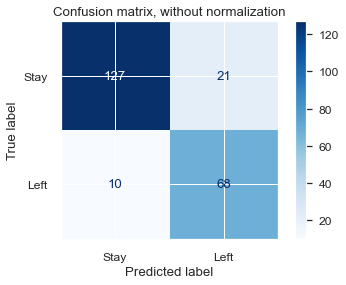

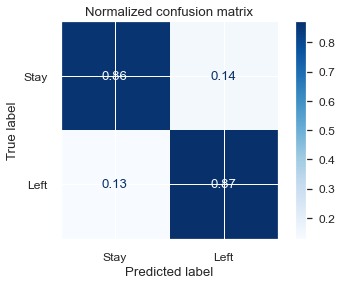

--------------------------------------------------------------------------------
*  UFS  *
--------------------------------------------------------------------------------
Neural Net model fit in 30.522 s
Best Score: 0.809 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


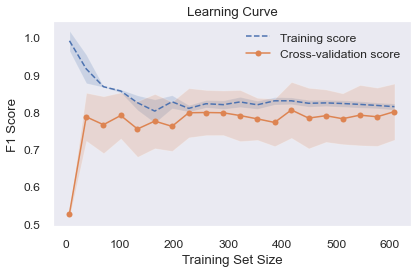

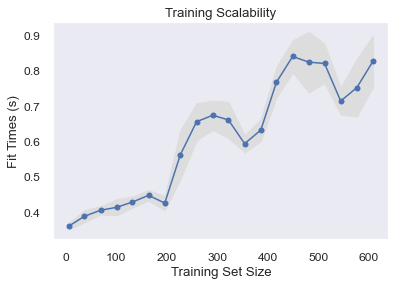

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       148
           1       0.83      0.86      0.84        78

    accuracy                           0.89       226
   macro avg       0.88      0.88      0.88       226
weighted avg       0.89      0.89      0.89       226



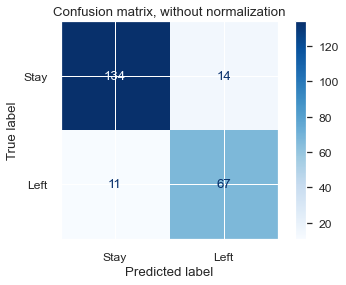

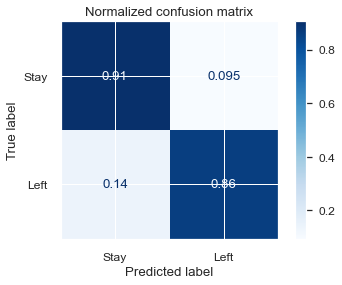

Results
Data:  Original
	Time:    33.02702045440674
	Score:   0.8372548756610907
	Params:  {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'adam'}
Data:  PCA
	Time:    33.07188320159912
	Score:   0.8378404252104996
	Params:  {'hidden_layer_sizes': (40, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Data:  ICA
	Time:    23.049487352371216
	Score:   0.8348624415804737
	Params:  {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  RP
	Time:    37.45412278175354
	Score:   0.8149988004516387
	Params:  {'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'solver': 'adam'}
Data:  UFS
	Time:    30.52210760116577
	Score:   0.8091417838771171
	Params:  {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [379]:
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

# Define Grid Search parameters
learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# define size of test set
test_size=0.25

# collect all results
nn_data = []

for d in HR_data:
    dataName = d[0]
    print_line(dataName)
    
    X1 = d[1]
    y = y
    
    # Scale the data
    #X = scale(X)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=test_size, random_state=100)
    
    clf = GridSearchCV(MLPClassifier(max_iter=500, alpha=1, random_state=100),
                       parameters,
                       cv=10,
                       scoring='f1',
                       n_jobs=-1)
                
    t0 = time()
    clf.fit(X_train, y_train)
    nn_time = time() - t0
    
    print("Neural Net model fit in %.3f s" % nn_time)
    print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))
    
    # Create NN with best parameters from grid search
    nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                       solver=clf.best_params_["solver"],
                       hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                       max_iter=500,
                       alpha=1,
                       random_state=100)
    
    # plot the learning curve for the data
    plot_learning_curve(nn, X_train, y_train)

    # Predict results using the test set
    nn.fit(X_train, y_train)
    nn_pred = nn.predict(X_test)
    
    # Calculate Null Accuracy
    calculate_null_accuracy(y)
    
    # let's see how our model performed
    print(classification_report(y_test, nn_pred))
    
    plot_confusion(nn, X_test, y_test, labels)
    
    
    # Collect results
    results = {
        "classifier": nn,
        "dataset": dataName,
        "time":    nn_time,
        "score":   clf.best_score_,
        "params":  clf.best_params_
    }
    
    nn_data.append(results)

print('Results')
for res in nn_data:
    print('Data: ',     res["dataset"])
    print('\tTime:   ', res["time"])
    print('\tScore:  ', res["score"])
    print('\tParams: ', res["params"])

<div class="alert alert-block alert-warning">
<b>5 NN with Dimensionality Reduction and Clustering Applied to Dataset</b>
</div> </a><a class="anchor" id="encoding"></a>

### K-means

In [380]:
# create dataset

# cluster data and predict labels
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=100)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.predict(X_scaled)

label_diff = (kmeans_labels - y)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(y)-len(label_diff), len(y), (len(y)-len(label_diff))/len(y)*100))

# add in cluster labels as additional feature
kmeans_HR_X = np.c_[X_scaled, kmeans_labels]

X_NN = kmeans_HR_X
y = y

Correct Labels: 480/902, 53.22 percent


Neural Net model fit in 37.000 s
Best Score: 0.832 using {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'adam'}


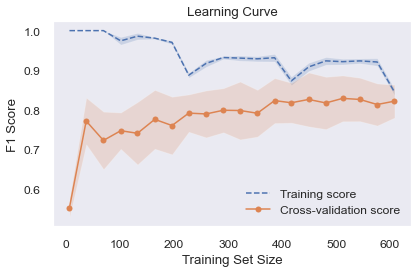

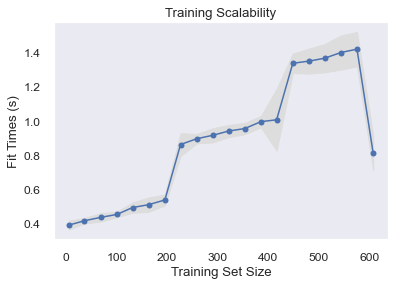

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       148
           1       0.85      0.92      0.88        78

    accuracy                           0.92       226
   macro avg       0.90      0.92      0.91       226
weighted avg       0.92      0.92      0.92       226



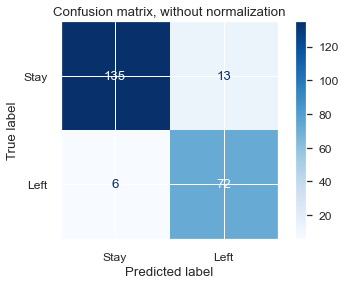

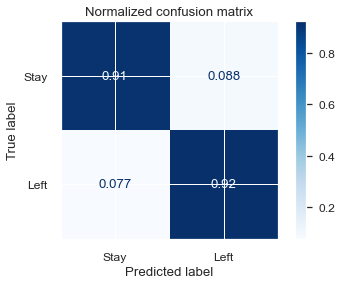

0

In [381]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}



# define size of test set
test_size=0.25


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_NN, y, test_size=test_size, random_state=100)

clf = GridSearchCV(MLPClassifier(max_iter=500, alpha=1, random_state=100),
                   parameters,
                   cv=10,
                   scoring='f1',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=500,
                   alpha=1,
                   random_state=100)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)

### Expectation Maximization

In [382]:
# create dataset

# cluster data and predict labels
em = GaussianMixture(n_components=2, random_state=100)
em.fit(X_scaled)
em_labels = em.predict(X_scaled)

label_diff = (em_labels - y)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(y)-len(label_diff), len(y), (len(y)-len(label_diff))/len(y)*100))


# add in cluster labels as additional feature
em_HR_X = np.c_[X_scaled, em_labels]

X_NN = em_HR_X
y = y

Correct Labels: 522/902, 57.87 percent


Neural Net model fit in 36.527 s
Best Score: 0.829 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


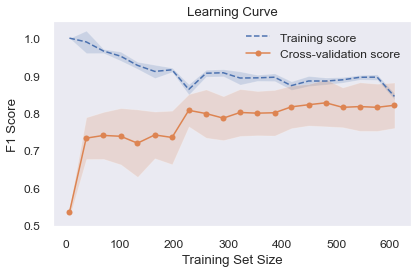

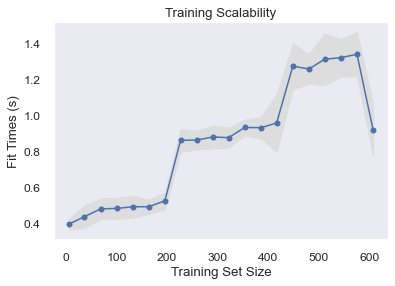

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       148
           1       0.84      0.90      0.87        78

    accuracy                           0.91       226
   macro avg       0.89      0.90      0.90       226
weighted avg       0.91      0.91      0.91       226



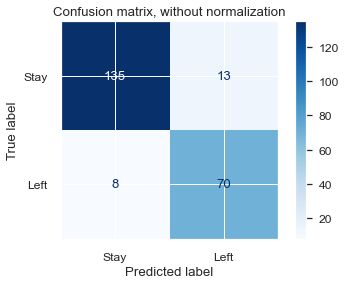

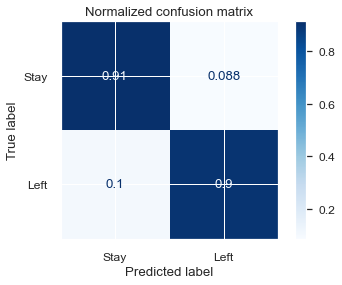

0

In [383]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}


# define size of test set
test_size=0.25


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_NN, y, test_size=test_size, random_state=100)

clf = GridSearchCV(MLPClassifier(max_iter=500, alpha=1, random_state=100),
                   parameters,
                   cv=10,
                   scoring='f1',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=500,
                   alpha=1,
                   random_state=100)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)